In [252]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios

from formulaic import Formula

#### Ejercicio 1. Queremos estudiar la relación entre la longitud de la aleta de un pingüino y el peso del pingüino. Como en una esfera, el peso es proporcional a la longitud del radio elevada al cubo, podemos conjeturar que un polinomio de grado 3 es apropiado para ajustar el peso en función de la longitud de la aleta. Queremos verificar si nuestra conjetura tiene sustento en los datos.

#### a) Datos faltantes. Ejecutar el siguiente c ́odigo y observar si hay filas con datos faltantes (NaN)

In [3]:
peng = sns.load_dataset("penguins")
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
peng.isnull().values.any()

True

In [5]:
peng = peng.dropna()#quito las filas con valores NaN

In [6]:
peng.isnull().values.any()

False

#### b) Conjuntos de entrenamiento y testeo. Dividir el dataset resultante en un grupo de entrenamiento y uno de testeo (80% - 20%). Hacerlo de las siguientes dos formas distintas:A. Utilizando un array de Numpy para filtrar:i. Crear un array de Numpy booleano de longitud igual a la cantidad de filas del DataFrame que tome el valor True en el primer 80% de las coordenadas y False en el restante 20%.ii. Si se quiere seleccionar una muestra al azar, se puede utilizar numpy.random.shuffle para “mezclar” el vector. iii. Utilizar el vector generado para filtrar el Dataframe

In [7]:
peng.shape

(333, 7)

In [8]:
train_ind = np.full(333,False)#genero el vector de 333 elementos todos = False

In [9]:
train_ind[0:266] = True #elijo que el 80% tenga valor true

In [10]:
np.random.shuffle(train_ind ) #Mezclo los índices donde están lso t/f

In [11]:
penguin_train = peng[train_ind] #elijo "al azar" que filas tomo como datos de entrenamiento

In [12]:
penguin_train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,Male
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [13]:
penguin_test = peng[train_ind == False]

In [14]:
penguin_test.shape

(67, 7)

####  b. Utilizando la función train_test_split de sklearn:

In [15]:
from sklearn.model_selection import train_test_split

penguins_train,penguins_test = train_test_split(peng ,test_size =0.2,random_state =42)

In [16]:
penguins_train.shape

(266, 7)

#### c) Crear y ajustar 3 modelos utilizando polinomios de grados 1, 2 y 3. d) Calcular para cada uno el error predicci ́on en el grupo de entrenamiento y en el grupo de test.

In [17]:
mod_grado1 = linear_model.LinearRegression()
mod_grado1.fit(penguins_train[["flipper_length_mm"]], penguins_train[["body_mass_g"]])

y_pred = mod_grado1.predict(penguins_train[["flipper_length_mm"]])
r2=r2_score(penguins_train["body_mass_g"], y_pred)
print(f"El R^2 para el polinomio de grado 1 con datos de entrenamiento es: {r2}")

El R^2 para el polinomio de grado 1 con datos de entrenamiento es: 0.7541483336256305


In [18]:
#grado 2 con datos de entrenamiento
polynomial_features= PolynomialFeatures(degree=2, include_bias=False) 

x_grad2 = polynomial_features.fit_transform(penguins_train[["flipper_length_mm"]])   

In [19]:
mod_grado2 = linear_model.LinearRegression()
mod_grado2.fit(x_grad2, penguins_train[["body_mass_g"]])

print(mod_grado2.coef_)

y_pred2 = mod_grado2.predict(x_grad2)
r2_grado2 = r2_score(penguins_train[["body_mass_g"]],y_pred2)
print(f"El R^2 para el polinomio de grado 2 con datos de entrenamiento es: {r2_grado2}")

[[-193.49746518    0.60030709]]
El R^2 para el polinomio de grado 2 con datos de entrenamiento es: 0.7728101612061435


In [20]:
#grado 3
polynomial_features3= PolynomialFeatures(degree=3, include_bias=False) 

x_grad3 = polynomial_features3.fit_transform(penguins_train[["flipper_length_mm"]])   

In [21]:
mod_grado3 = linear_model.LinearRegression()
mod_grado3.fit(x_grad3, penguins_train[["body_mass_g"]])

print(mod_grado3.coef_)

y_pred3 = mod_grado3.predict(x_grad3)
r2_grado3 = r2_score(penguins_train[["body_mass_g"]],y_pred3)
print(f"El R^2 para el polinomio de grado 3 con datos de entrenamiento es: {r2_grado3}")

[[-2.60703406e+03  1.25325842e+01 -1.96046866e-02]]
El R^2 para el polinomio de grado 3 con datos de entrenamiento es: 0.7785640221262238


In [22]:
#grado2 con datos de testeo
polynomial_featuresTest2= PolynomialFeatures(degree=2, include_bias=False) 

x_grad2Test = polynomial_features.fit_transform(penguins_test[["flipper_length_mm"]])   


In [23]:
mod_grado2T = linear_model.LinearRegression()
mod_grado2T.fit(x_grad2Test, penguins_test[["body_mass_g"]])

y_pred2T = mod_grado2T.predict(x_grad2Test)
r2_grado2T = r2_score(penguins_test[["body_mass_g"]],y_pred2T)
print(f"El R^2 para el polinomio de grado 2 con datos de test es: {r2_grado2T}")

El R^2 para el polinomio de grado 2 con datos de test es: 0.8051778659142177


In [24]:
#grado3 con datos de testeo
polynomial_featuresTest3= PolynomialFeatures(degree=3, include_bias=False) 

x_grad3Test = polynomial_featuresTest3.fit_transform(penguins_test[["flipper_length_mm"]])   


In [25]:
mod_grado3T = linear_model.LinearRegression()
mod_grado3T.fit(x_grad3Test, penguins_test[["body_mass_g"]])

y_pred3T = mod_grado3T.predict(x_grad3Test)
r2_grado3T = r2_score(penguins_test[["body_mass_g"]],y_pred3T)
print(f"El R^2 para el polinomio de grado 3 con datos de test es: {r2_grado3T}")

El R^2 para el polinomio de grado 3 con datos de test es: 0.8079365838467927


#### d) ¿Cuál modelo tiene el menor error (ECM) en el ajuste? ¿Cuál el menor error (ECM) de predicción?

In [26]:
ecm_g1T = mean_squared_error(penguins_train[["body_mass_g"]], y_pred)

ecm_g2T = mean_squared_error(penguins_test[["body_mass_g"]], y_pred2T)

ecm_g3T = mean_squared_error(penguins_test[["body_mass_g"]], y_pred3T)
min_ecm = min(ecm_g1T,ecm_g2T,ecm_g3T)
print(f" El ECM para cada grado es/- grado 1: {ecm_g1T}/- grado 2: {ecm_g2T}/- grado 3: {ecm_g3T}. La menor de ellas es {min_ecm}")


 El ECM para cada grado es/- grado 1: 159873.09549908544/- grado 2: 122726.60625115805/- grado 3: 120988.77450499691. La menor de ellas es 120988.77450499691


#### f) En base a los resultados obtenidos, ¿cu ́al de los tres modelos utilizar ́ıa?

Utilizaría el modelo cúbico, pero no parece haber una diferencia tan significativa con el cuadrático.

### 2. En el archivo 50_startups.csv tenemos los siguientes datos de 50 compañías: gastos en investigación y desarrollo, gastos administrativos, gastos en marketing y ganancias. Queremos estimar las ganancias a partir de los gastos en las distintas áreas.
#### (a) Leer el archivo, y realizar un gráfico de dispersión para cada par de variables. Se pueden generar todos los gráficos automásticamente con el pairplot.

In [27]:
df_starup = pd.read_csv("50_startups.csv")
df_starup.head()

,Investigacion,Administracion,Marketing,Estado,Ganancia
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


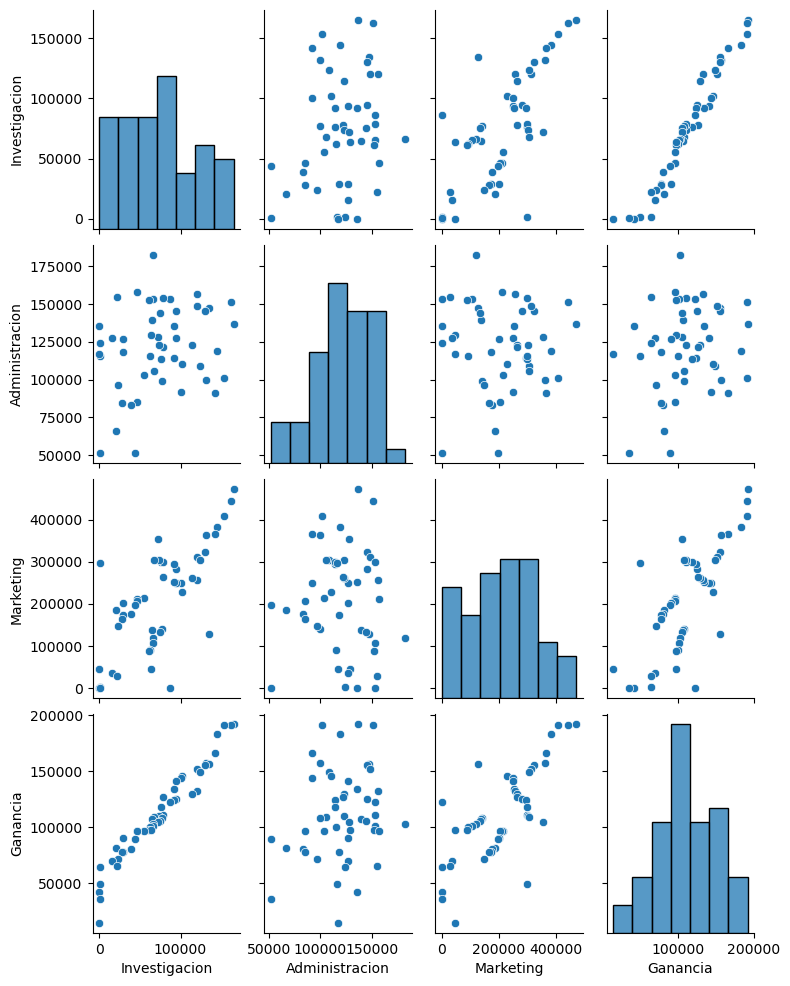

In [28]:
(
    sns.pairplot(df_starup, aspect = .8)
)

#### En base a estos gráficos, si quisiéramos predecir la ganancia mediante un modelo lineal utilizando una sola variable predictora, ¿cuál variable utilizaría? Diseñar un experimento para verificar su respuesta.`

Utilizaría ganancias en función del marketing o la investigación. puedo generar modelos lineales para cada una de las variables y ver cuál se aproxima mejor mediante un polinomio de grado 1. A menor dispersión mejor será la aproximación elegida. A ojo debería ser mejor predecir por investigación > marketing > administración

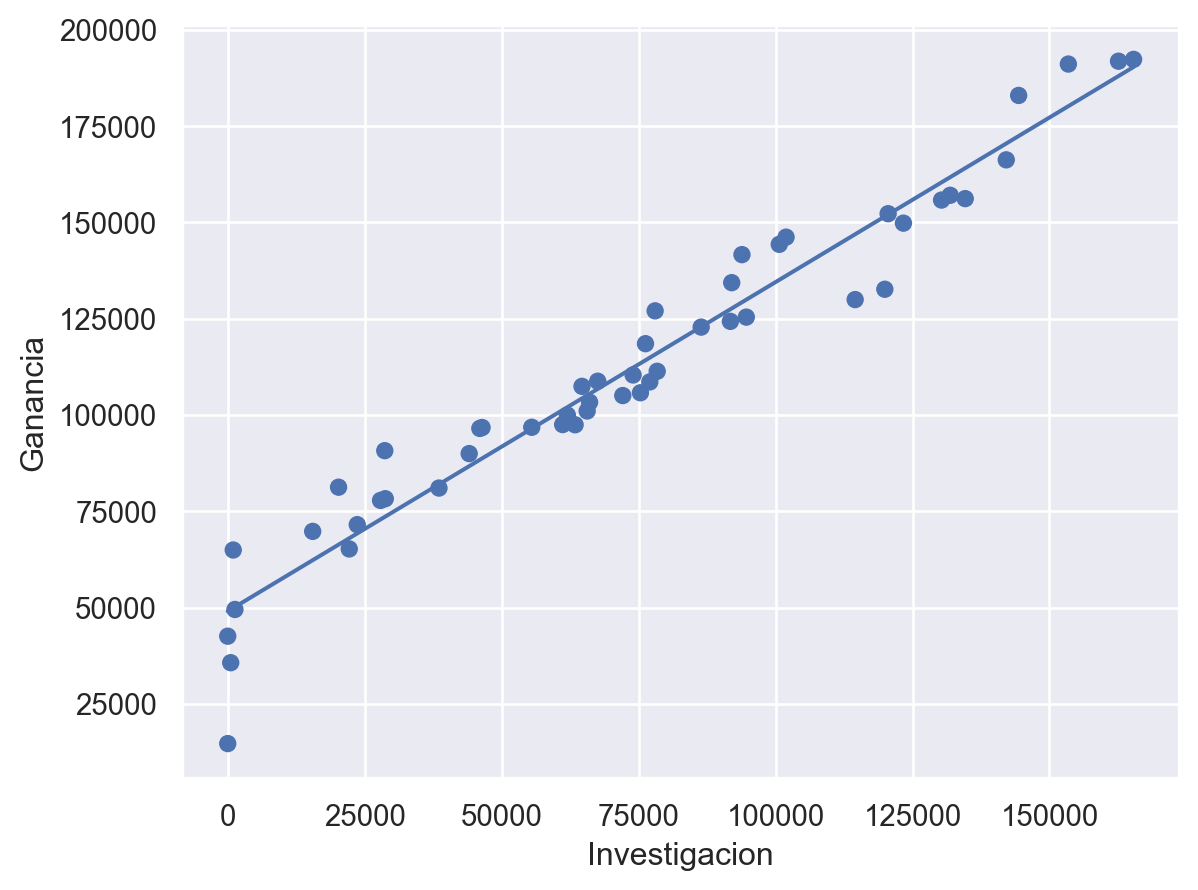

In [29]:
(
    so.Plot(df_starup, "Investigacion", "Ganancia")
    .add(so.Dot())
    .add(so.Line(),so.PolyFit(1))
)

Text(0.5, 1.18, 'Relación de ganancias vs gastos en Investigación y Marketing')

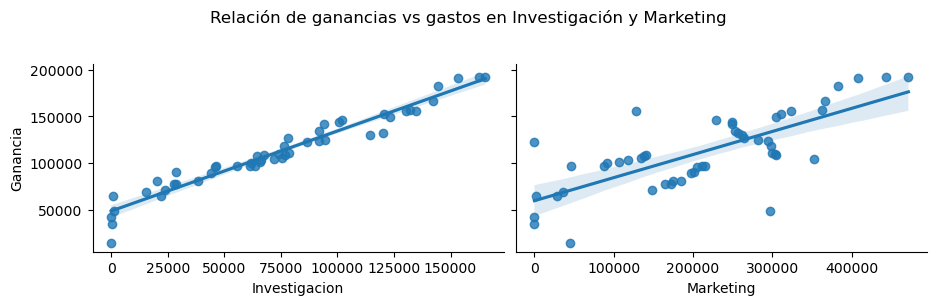

In [30]:
 sns.pairplot(df_starup,
                  x_vars=['Investigacion', 'Marketing'],
                  y_vars=['Ganancia'], kind = 'reg',aspect =1.9).fig.suptitle("Relación de ganancias vs gastos en Investigación y Marketing",y = 1.18)


Realizo nuevamente una división de los datos 80-20 para ver como se comportan los modelos en lso datos de test y de entrenamiento, utilizando como variable predictora primero el gasto en investigación y luego el gasto en marketing

In [31]:
startup_train,startup_test = train_test_split(df_starup ,test_size =0.2,random_state =2)

In [32]:
#Creo el modelo lineal con los datos de entrenamiento

modelo_invest = linear_model.LinearRegression()
modelo_invest.fit(startup_train[["Investigacion"]], startup_train[["Ganancia"]])
predict_invest = modelo_invest.predict(startup_train[["Investigacion"]])

r2_invest = r2_score(startup_train[["Ganancia"]], predict_invest)
print(f"El modelo linear utilizando los datos de investigación con los que entrené el modelo como predictores dieron un R^2 de: {r2_invest}")

El modelo linear utilizando los datos de investigación con los que entrené el modelo como predictores dieron un R^2 de: 0.9346200123014297


In [33]:

predict_invest_test = modelo_invest.predict(startup_test[["Investigacion"]])

r2_invest_test = r2_score(startup_test[["Ganancia"]], predict_invest_test)
print(f"El modelo linear utilizando los datos test de investigación como predictores dieron un R^2 de: {r2_invest_test}")


El modelo linear utilizando los datos test de investigación como predictores dieron un R^2 de: 0.9781479442510737


Ahora hago el mismo procedimiento utilizando la variable de marketing como predictora

In [34]:
#Creo el modelo lineal con los datos de entrenamiento para marketing como predictora

modelo_mkt = linear_model.LinearRegression()
modelo_mkt.fit(startup_train[["Marketing"]], startup_train[["Ganancia"]])
predict_mkt_train = modelo_mkt.predict(startup_train[["Marketing"]])

r2_mkt_train = r2_score(startup_train[["Ganancia"]], predict_mkt_train)
print(f"El modelo linear utilizando los datos de marketing con los que entrené el modelo como predictores dieron un R^2 de: {r2_mkt_train}")

El modelo linear utilizando los datos de marketing con los que entrené el modelo como predictores dieron un R^2 de: 0.5713918052689373


In [35]:
predict_mkt_test = modelo_mkt.predict(startup_test[["Marketing"]])

r2_mkt_test = r2_score(startup_test[["Ganancia"]], predict_mkt_test)
print(f"El modelo linear utilizando los datos de marketing con los que entrené el modelo como predictores dieron un R^2 de: {r2_mkt_test}")

El modelo linear utilizando los datos de marketing con los que entrené el modelo como predictores dieron un R^2 de: 0.47287785306570407


El modelo da horrible para los datos de marketing como variable predictiva, así que la mejor opción es utilizar los de investigación.

#### b) En este ejemplo, ¿considera que un modelo lineal multivariado ayudaría a predecir mejor la ganancia que el modelo lineal univariado del  ítem anterior? Realizar un experimento para verificar su respuesta.

In [36]:
y, X = (
    Formula('Ganancia ~ Investigacion + Marketing + Administracion')
    .get_model_matrix(df_starup)
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [37]:
mod_multi_suma = linear_model.LinearRegression(fit_intercept = False)
mod_multi_suma.fit(X_train,y_train)

multi_pred = mod_multi_suma.predict(X_train)

r2_sumaMulti = r2_score(y_train, multi_pred)

display(r2_sumaMulti)

0.9397277457511108

In [38]:
#veo como se comporta con los datos de test

multi_pred_test = mod_multi_suma.predict(X_test)

r2_sumaMultiT = r2_score(y_test, multi_pred_test)

display(r2_sumaMultiT)

0.9794909902425316

#### 3. En el Ejercicio 1 no tuvimos en cuenta el sexo del pingüino para predecir el peso, y puede ser una variable importante. Se quiere predecir ahora el peso de un pingüino usando como variables predictoras el largo de la aleta y el sexo del pingu ̈ino (utilizar el DataFrame sin datos faltantes, como vimos en el Ejercicio 1 (a))

#### (a) ¿Cuáles son todos los valores que toma la variable “sex”? ¿Qué tipo de variable es: numérica o categórica, ordinal o nominal? ¿Es una variable binaria?
#### (b) Escribir (en lápiz y papel) la ecuación de un modelo lineal para este caso. ¿Qué unidades tienen las variables y cómo se codifica la variable “sexo del pinguino”?
#### (d) Ajustar el modelo usando todos los datos disponibles. Reportar los coeficientes encontrados y calcular el error de predicción (ECM). ¿Considera que agregar la variable “sex” mejoró el modelo?
#### (e) Realizar una visualización apropiada para ver de los datos junto con las predicciones del modelo.
#### (f) Dos pingüinos que tienen igual largo de aleta, uno macho y otro hembra, ¿qué diferencia de peso predice el modelo que tendrán?

In [39]:
peng.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Creo primero el modelo lineal usando Formulaic, solo sumando la variable sex

In [64]:
y,X = Formula("body_mass_g ~ flipper_length_mm + sex").get_model_matrix(peng)
#display(X)

In [41]:
mod_peso_peng = linear_model.LinearRegression(fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
mod_peso_peng.fit(X, y)   # Realiza
print("Coeficientes:", mod_peso_peng.coef_)

Coeficientes: [[-5410.30022414    46.98217525   347.85025373]]


In [70]:
pred_peso_peng = mod_peso_peng.predict(X)
#display(pred_peso_peng)

# Calculando el R^2
r2_sum = r2_score(y, pred_peso_peng)
print('R^2(+): ', r2_sum)
ecm_sum = mean_squared_error(peng[["body_mass_g"]], pred_peso_peng)
print(f" El ECM es de: {ecm_sum} y su raíz cuadrada {np.sqrt(ecm_sum)}")

R^2(+):  0.8058374128212914
 El ECM es de: 125511.6325809571 y su raíz cuadrada 354.2762094481608


Ahora pruebo multiplicando las variables de largo y sexo

In [61]:
y_mult,X_mult = Formula("body_mass_g ~ flipper_length_mm * sex").get_model_matrix(peng)
#display(X_mult)

In [71]:
mod_peso_mult = linear_model.LinearRegression(fit_intercept = False)    
mod_peso_mult.fit(X_mult, y_mult)

pred_peso_mult = mod_peso_mult.predict(X_mult)

r2_prod = r2_score(y1, pred_peso_mult)
print('R^2(*): ', r2_prod)
ecm_mult = mean_squared_error(peng[["body_mass_g"]], pred_peso_mult)
print(f" El ECM multiplicando las variables es de: {ecm_mult} y su raíz cuadrada {np.sqrt(ecm_mult)}")

R^2(*):  0.8058433870069638
 El ECM multiplicando las variables es de: 125507.77071545576 y su raíz cuadrada 354.27075904660234


In [72]:
y_poly3,X_poly3 = Formula("body_mass_g ~ poly(flipper_length_mm,3) * sex").get_model_matrix(peng)
#display(X_poly3)

mod_peso_poly3 = linear_model.LinearRegression(fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
mod_peso_poly3.fit(X_poly3, y_poly3)   # Realiza

pred_peso_poly3 = mod_peso_poly3.predict(X_poly3)

# Calculando el R^2
r2_poly3 = r2_score(y_poly3, pred_peso_poly3)
print('R^2(polinomio grado 3 * sex): ', r2_poly3)
ecm_poly3 = mean_squared_error(peng[["body_mass_g"]], pred_peso_poly3)
print(f" El ECM es de: {ecm_poly3} y su raíz cuadrada {np.sqrt(ecm_poly3)}")

R^2(polinomio grado 3 * sex):  0.8380697390695278
 El ECM es de: 104675.83744615782 y su raíz cuadrada 323.53645458612203


In [73]:
y_poly3_relacion,X_poly3_relacion = Formula("body_mass_g ~ poly(flipper_length_mm,3) : sex").get_model_matrix(peng)
#display(X_poly3_relacion)

mod_peso_poly3_relacion = linear_model.LinearRegression(fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
mod_peso_poly3_relacion.fit(X_poly3_relacion, y_poly3_relacion)   # Realiza

pred_peso_poly3_relacion = mod_peso_poly3_relacion.predict(X_poly3_relacion)

# Calculando el R^2
r2_poly3_relacion = r2_score(y_poly3_relacion, pred_peso_poly3_relacion)
print('R^2(polinomio grado 3 : sex): ', r2_poly3_relacion)

ecm_poly3_rela = mean_squared_error(peng[["body_mass_g"]], pred_peso_poly3_relacion)
print(f" El ECM es de: {ecm_poly3_rela} y su raíz cuadrada {np.sqrt(ecm_poly3_rela)}")


R^2(polinomio grado 3 : sex):  0.798145611876589
 El ECM es de: 130483.80826158285 y su raíz cuadrada 361.2254258237961


In [74]:
print(f' Así vemos que el modelo que generamos con un polinomio de grado 3 en el largo de las aletas multiplicado por el sexo es el modelo que mejor R^2 da con un valor de {r2_poly3} y un ECM de {ecm_poly3}')

 Así vemos que el modelo que generamos con un polinomio de grado 3 en el largo de las aletas multiplicado por el sexo es el modelo que mejor R^2 da con un valor de 0.8380697390695278 y un ECM de 104675.83744615782


In [123]:
from seaborn import set_theme

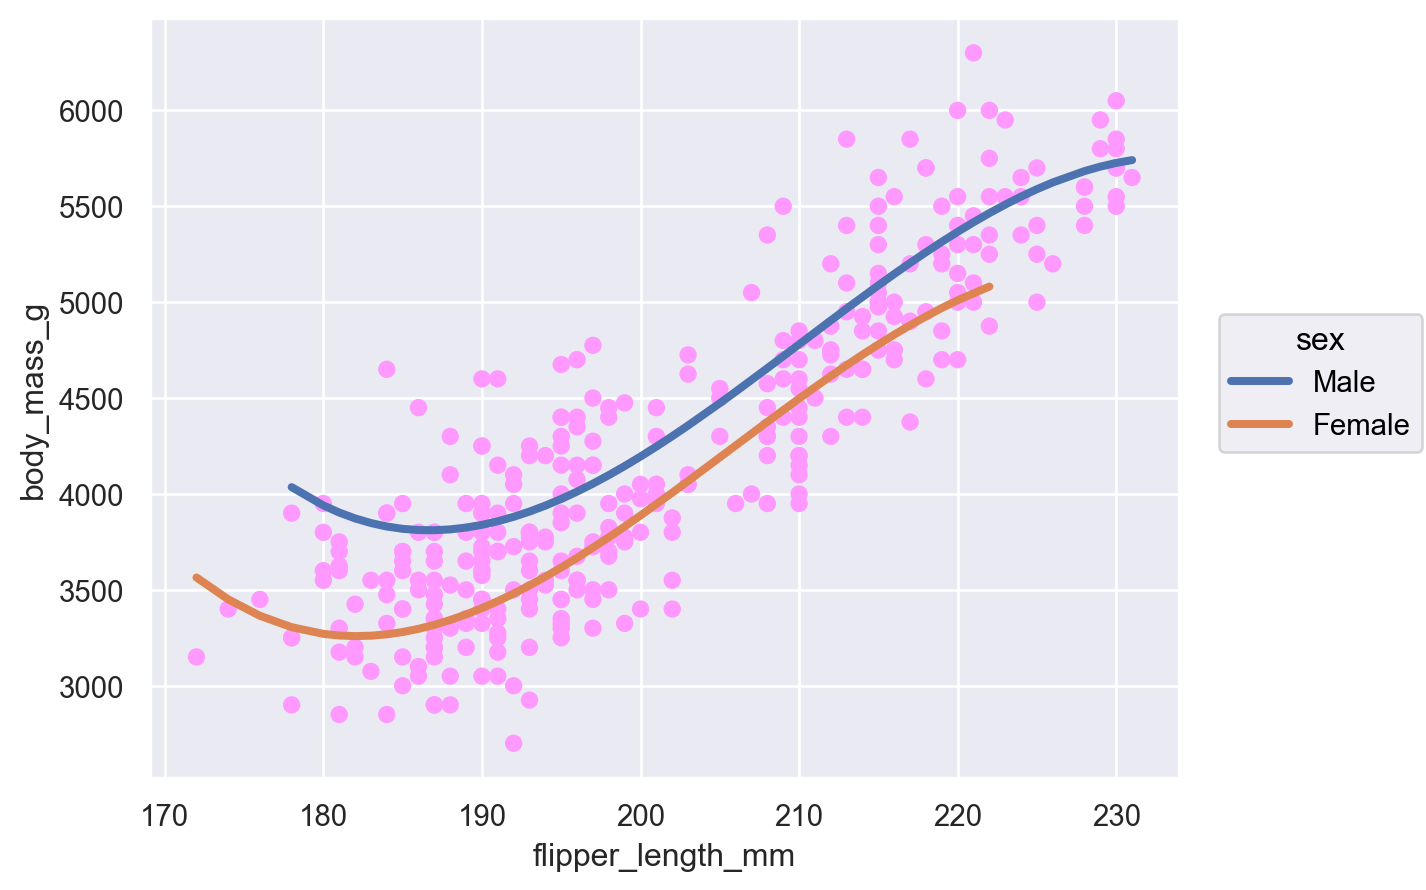

In [152]:
colors = {"Male": "green", "Female": "black"}
(
    so.Plot(peng, x = "flipper_length_mm", y = "body_mass_g" )
    .add(so.Dot(color = '#FF99FF'))
    .add(so.Line(linewidth = 3), y = pred_peso_poly3.flatten(), color = "sex")
)

Por ver el gráfico, pareciera ser que el peso del macho sería mayor. 

### 4. Ahora se quiere predecir el peso de un pinguino usando como variables predictoras el largo de la aleta y la especie del pingüino.


In [155]:
from sklearn.preprocessing import OneHotEncoder
penguins = sns.load_dataset("penguins").dropna()
encoderOHE = OneHotEncoder(sparse_output = False)
species3 = encoderOHE.fit_transform(penguins[["species"]])
species3_df = pd.DataFrame(species3 ,columns=encoderOHE.get_feature_names_out(), index=penguins.index)
penguins3 = pd.concat([penguins, species3_df], axis = 1)
penguins3.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,0.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,0.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,0.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,0.0,0.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1.0,0.0,0.0


In [157]:
penguins3.isnull().values.any()#chequeo que no tenga valores faltantes

False

#### e) Ajustar el modelo usando todos los datos disponibles. Reportar los coeficientes encontrados y calcular el error de predicción.

In [202]:
peng_sex_train.head()

,Intercept,"poly(flipper_length_mm, 3)[1]","poly(flipper_length_mm, 3)[2]","poly(flipper_length_mm, 3)[3]",sex[T.Male],"poly(flipper_length_mm, 3)[1]:sex[T.Male]","poly(flipper_length_mm, 3)[2]:sex[T.Male]","poly(flipper_length_mm, 3)[3]:sex[T.Male]"
230,1.0,0.051034,-0.026854,-0.059412,0,0.000000,-0.000000,-0.000000
84,1.0,-0.039028,-0.013665,0.040878,0,-0.000000,-0.000000,0.000000
303,1.0,0.090191,0.064385,0.010608,1,0.090191,0.064385,0.010608
22,1.0,-0.046860,0.002175,0.035835,0,-0.000000,0.000000,0.000000
29,1.0,-0.082101,0.102545,-0.073696,1,-0.082101,0.102545,-0.073696


In [162]:
peng3_train.shape

(266, 7)

In [203]:
y_3train,X_3train = Formula("body_mass_g ~ poly(flipper_length_mm,3) * species").get_model_matrix(penguins)
display(X_3)



,Intercept,"poly(flipper_length_mm, 3)[1]","poly(flipper_length_mm, 3)[2]","poly(flipper_length_mm, 3)[3]",species[T.Chinstrap],species[T.Gentoo],"poly(flipper_length_mm, 3)[1]:species[T.Chinstrap]","poly(flipper_length_mm, 3)[2]:species[T.Chinstrap]","poly(flipper_length_mm, 3)[3]:species[T.Chinstrap]","poly(flipper_length_mm, 3)[1]:species[T.Gentoo]","poly(flipper_length_mm, 3)[2]:species[T.Gentoo]","poly(flipper_length_mm, 3)[3]:species[T.Gentoo]"
0,1.0,-0.078186,0.089042,-0.053092,0,0,-0.0,0.0,-0.0,-0.000000,0.000000,-0.000000
1,1.0,-0.058607,0.030342,0.016707,0,0,-0.0,0.0,0.0,-0.000000,0.000000,0.000000
2,1.0,-0.023365,-0.038292,0.036284,0,0,-0.0,-0.0,0.0,-0.000000,-0.000000,0.000000
4,1.0,-0.031197,-0.027154,0.040744,0,0,-0.0,-0.0,0.0,-0.000000,-0.000000,0.000000
5,1.0,-0.042944,-0.006039,0.039056,0,0,-0.0,-0.0,0.0,-0.000000,-0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
338,1.0,0.051034,-0.026854,-0.059412,0,1,0.0,-0.0,-0.0,0.051034,-0.026854,-0.059412
340,1.0,0.054950,-0.020375,-0.059332,0,1,0.0,-0.0,-0.0,0.054950,-0.020375,-0.059332
341,1.0,0.082360,0.041435,-0.017685,0,1,0.0,0.0,-0.0,0.082360,0.041435,-0.017685
342,1.0,0.043203,-0.038049,-0.056230,0,1,0.0,-0.0,-0.0,0.043203,-0.038049,-0.056230


In [180]:
peng3_train, peng3_test,peso_train, peso_test = train_test_split(X_3, y_3 ,test_size =0.2,random_state =42)


In [186]:

mod_peso_especie_relacionTrain = linear_model.LinearRegression(fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
mod_peso_especie_relacionTrain.fit(peng3_train, peso_train)   # Realiza

pred_peso_especie_relTrain = mod_peso_especie_relacionTrain.predict(peng3_train)

# Calculando el R^2
r2_especie_relacionTrain = r2_score(peso_train, pred_peso_especie_relTrain)
print('R^2(polinomio grado 3 : especie): ', r2_especie_relacionTrain)

ecm_peso_relaTrain = mean_squared_error(peso_train, pred_peso_especie_relTrain)
print(f" El ECM con los datos de entrenamiento es de: {ecm_peso_relaTrain} y su raíz cuadrada {np.sqrt(ecm_peso_relaTrain)}")

R^2(polinomio grado 3 : especie):  0.793942499098905
 El ECM con los datos de entrenamiento es de: 133995.6364977399 y su raíz cuadrada 366.0541442160434


#### Ahora veo como se comporta con los datos de testeo este modelo y el que utilizaba las mismas relaciones pero con sexo en vez de especie

In [187]:

pred_peso_especie_relTest = mod_peso_especie_relacionTrain.predict(peng3_test)#testeo el modelo que relaciona con species

# Calculando el R^2
r2_especie_relacionTest = r2_score(peso_test, pred_peso_especie_relTest)
print('R^2(polinomio grado 3 : especie): ', r2_especie_relacionTest)

ecm_peso_relaTest = mean_squared_error(peso_test, pred_peso_especie_relTest)
print(f" El ECM con los datos de test usando especies en vez de sexo es de: {ecm_peso_relaTrain} y su raíz cuadrada {np.sqrt(ecm_peso_relaTrain)}")

R^2(polinomio grado 3 : especie):  0.8131314848566891
 El ECM con los datos de test usando especies en vez de sexo es de: 133995.6364977399 y su raíz cuadrada 366.0541442160434


In [214]:
peng_sex_Train, peng_sex_Test = train_test_split(penguins3 ,test_size =0.2,random_state =42)


In [215]:
peso_sex_train,peng_sex_train = Formula("body_mass_g ~ poly(flipper_length_mm,3) * sex").get_model_matrix(peng_sex_Train)
#display(X_3)


In [216]:
peso_sex_test, peng_sex_test = Formula("body_mass_g ~ poly(flipper_length_mm,3) * sex").get_model_matrix(peng_sex_Test)

In [230]:

modelo_peso_sexo = linear_model.LinearRegression(fit_intercept = False)
modelo_peso_sexo.fit(peng_sex_train, peso_sex_train)


pred_peso_sex_train = modelo_peso_sexo.predict(peng_sex_train)#testeo el modelo que relaciona con sex

# Calculando el R^2
r2_sex_relacionTrain = r2_score(peso_train, pred_peso_sex_train)
print('R^2(polinomio grado 3 : especie): ', r2_sex_relacionTrain)

ecm_peso_sexTrain = mean_squared_error(peso_train, pred_peso_sex_train)
print(f" El ECM con los datos de entrenamiento usando sexo y no especie es de: {ecm_peso_sexTrain} y su raíz cuadrada {np.sqrt(ecm_peso_sexTrain)}")


pred_peso_sex_test = modelo_peso_sexo.predict(peng_sex_test)#testeo el modelo que relaciona con sex

# Calculando el R^2
r2_sex_relacionTest = r2_score(peso_test, pred_peso_sex_test)
print('R^2(polinomio grado 3 : especie): ', r2_sex_relacionTest)

ecm_peso_sexTest = mean_squared_error(peso_test, pred_peso_sex_test)
print(f" El ECM con los datos de test usando sexo y no especie es de: {ecm_peso_sexTest} y su raíz cuadrada {np.sqrt(ecm_peso_sexTest)}")

R^2(polinomio grado 3 : especie):  0.8314629949342085
 El ECM con los datos de entrenamiento usando sexo y no especie es de: 109596.70562079274 y su raíz cuadrada 331.05393158939034
R^2(polinomio grado 3 : especie):  0.11490913874125241
 El ECM con los datos de test usando sexo y no especie es de: 557555.7322371402 y su raíz cuadrada 746.6965462871381


In [244]:
peso_species_train,peng_species_train = Formula("body_mass_g ~ poly(flipper_length_mm,3) * species").get_model_matrix(peng_sex_Train)
#display(X_3)

peso_species_test, peng_species_test = Formula("body_mass_g ~ poly(flipper_length_mm,3) * species").get_model_matrix(peng_sex_Test)

modelo_especie_peso = linear_model.LinearRegression(fit_intercept = False)
modelo_especie_peso.fit(peng_species_train, peso_species_train)


pred_peso_species_train = modelo_especie_peso.predict(peng_species_train)


Bastante mejor usando la variable sexo sobre especie

#### (f) Realizar una visualizació(n apropiada para ver de los datos junto con las predicciones del modelo.

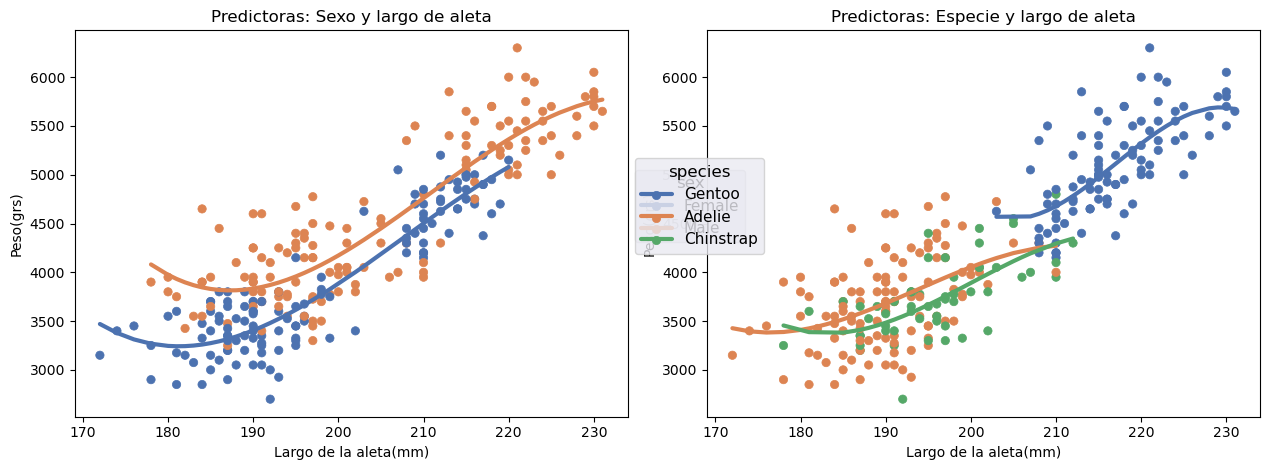

In [386]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

(
    so.Plot(peng_sex_Train, x = "flipper_length_mm" )
    .add(so.Dot(), y = "body_mass_g", color = 'sex')
    .add(so.Line(linewidth = 3), y = pred_peso_sex_train.flatten(), color = 'sex') 
    .on(ax1)
    .plot()
    
    
)
(
    so.Plot(peng_sex_Train, x = "flipper_length_mm" )
    .add(so.Dot(), y = "body_mass_g", color = 'species')
    .add(so.Line(linewidth = 3), y = pred_peso_species_train.flatten(), color ='species') 
    .on(ax2)
    .plot()
)
ax1.set_title("Predictoras: Sexo y largo de aleta")
ax2.set_title("Predictoras: Especie y largo de aleta")
ax2.set_xlabel("Largo de la aleta(mm)")
ax1.set_xlabel("Largo de la aleta(mm)")
ax2.set_ylabel("Peso(grs)")
ax1.set_ylabel("Peso(grs)")

plt.tight_layout(rect=[0, 0, 2, 1])
#plt.tight_layout()
plt.show()

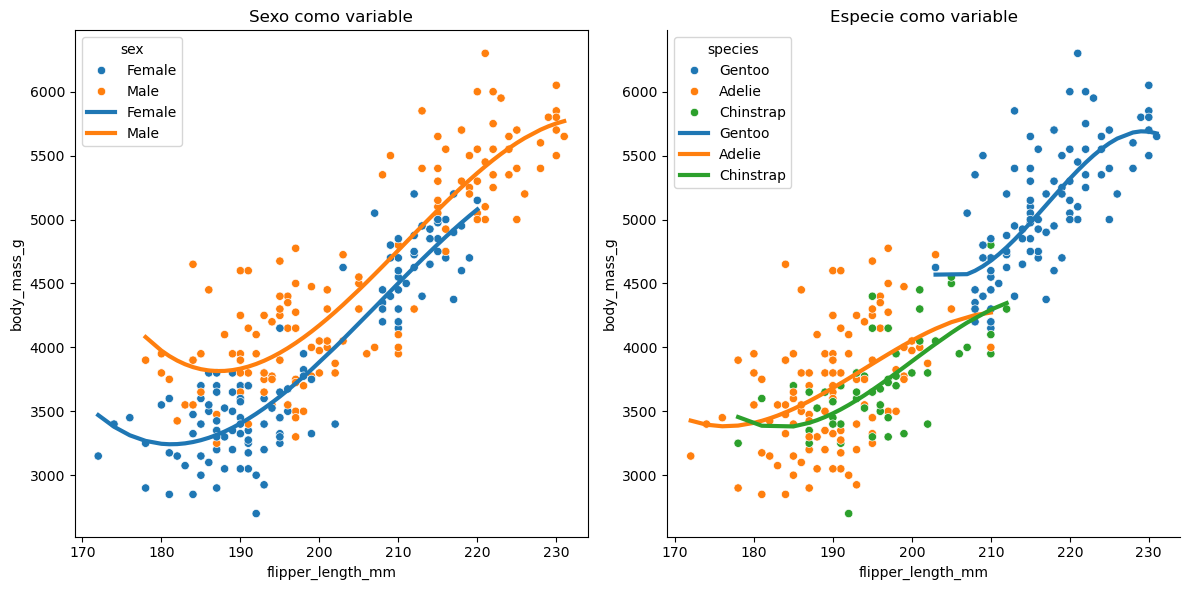

In [280]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 

sns.scatterplot(data=peng_sex_Train, x="flipper_length_mm", y="body_mass_g", hue="sex", ax=ax[0])
sns.lineplot(x=peng_sex_Train["flipper_length_mm"], y=pred_peso_sex_train.flatten(), hue=peng_sex_Train["sex"], ax=ax[0], linewidth=3)
ax[0].set_title('Sexo como variable')



sns.despine(ax=ax[1])
sns.scatterplot(data=peng_sex_Train, x="flipper_length_mm", y="body_mass_g", hue="species", ax=ax[1])
sns.lineplot(x=peng_sex_Train["flipper_length_mm"], y=pred_peso_species_train.flatten(), hue=peng_sex_Train["species"], ax=ax[1], linewidth=3)
ax[1].set_title('Especie como variable')

plt.tight_layout()  
plt.show()
